In [5]:
# import plotting tools & formatting. 

import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["mathtext.fontset"] ='custom'
plt.rcParams['mathtext.rm'] = 'Helvetica'
plt.rcParams['mathtext.it'] = 'Helvetica:italic'
plt.rcParams['mathtext.bf'] = 'Helvetica'
plt.rcParams["font.size"] = "6"
plt.rcParams['axes.linewidth'] = 0.65
plt.rcParams['lines.linewidth'] = 0.65
plt.rcParams['lines.markersize'] = 2.5

import numpy as np
from numpy import genfromtxt

import json
import ase


In [6]:
structures = []
energies = []

def get_json_data(filename):

    with open(f'../Data/Data_kinetics/{filename}.json') as data:
            cluster_data = json.load(data)
    for n, calculation in enumerate(cluster_data['calculation_results']):
        atoms = ase.Atoms(numbers=calculation['structure']['numbers'],
                          positions=calculation['structure']['positions'],
                          pbc=calculation['structure']['pbc'],
                          cell=calculation['structure']['cell'])
        numbers = atoms.numbers
        energy = float(calculation['energy'])
        energies.append(energy)
        structures.append(atoms)
    print('now we have:',len(structures),'structures & energies')
    
get_json_data('LLMO_HSE_AIMD_900K')

now we have: 9 structures & energies


In [7]:
# structure I is calculated in a (1x1x1) expansion of the conventional unit cell (80 atoms), 
# so we need to double the energy to then calculate a relative energy in eV, per 160-atom
# unit cell
energies[0] = energies[0]*2
rel_e = [e - (energies[0]) for e in energies]

# list of times (in ps) where the structures were extracted from the complete AIMD trajectory
times = [0, 39.45, 55.09, 90.27, 140.18, 144.62, 204.74, 351.07, 378.32]

# these are the indicies of the 'key structures' (structures, I, II,III and IV in 
# Figure 2b,c) that are highlighted in red in Figure 2d
key_structures = [0,3,6,8]

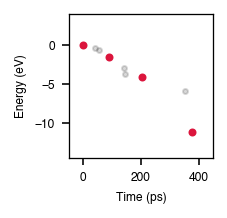

In [8]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(1, 1))

a = axes#

a.plot(times[:],rel_e[:],'o',color= 'black', alpha = 0.15)

for n in key_structures:
    a.plot(times[n],rel_e[n],'o',markersize = 3,color= 'crimson', alpha = 0.99)

a.set_ylabel('Energy (eV)')
a.set_ylim([-14.5, 4])
a.set_xlim([-50, 450])

a.set_xlabel('Time (ps)')

fig.subplots_adjust(bottom=0.0, top=1.0, left=0.0, right=1,
                    wspace=0.0, hspace=0.0)

#plt.savefig('test.png', dpi=300, bbox_inches='tight', format='png')
#plt.savefig('test.svg', dpi=300, bbox_inches='tight', format='svg')